In [1]:
libraries = c("rootSolve","ncdf4","dplyr","magrittr","chron","ggplot2","lattice","readxl","rEDM",
              "zoo","RColorBrewer","lubridate","tidyr")
for(x in libraries) {
    library(x,character.only=TRUE,warn.conflicts=FALSE) }

# options(jupyter.plot_mimetypes = "image/svg+xml") 
clrs = brewer.pal(8,"Set1")

windowsFonts(Times = windowsFont("Times New Roman"))
base_sz = 11 # base_size parameter

set.seed(523)

'%&%' <- function(x,y)paste0(x,y)

In [2]:
dfGeo = data.frame(lat=6.9325402,lon=6.1536795) #Irrua Specialist Teaching Hospital
dfGeo

lat,lon
6.93254,6.153679


# Rainfall

## First, to check for a given year

In [3]:
# set path and filename
ncpath <- "../data/Climate/Rainfall weekly"
ncyear <- "2010"  
ncfname <- paste0(ncpath, "/precip.", ncyear, ".nc")

In [4]:
# open a netCDF file
ncin <- nc_open(ncfname)
print(ncin)

File ../data/Climate/Rainfall weekly/precip.2010.nc (NC_FORMAT_NETCDF4_CLASSIC):

     1 variables (excluding dimension variables):
        float precip[lon,lat,time]   
            missing_value: -9.96920996838687e+36
            var_desc: Precipitation
            level_desc: Surface
            statistic: Total
            parent_stat: Other
            long_name: Daily total of precipitation
            cell_methods: time: sum
            avg_period: 0000-00-01 00:00:00
            actual_range: 0
             actual_range: 678.710021972656
            units: mm
            valid_range: 0
             valid_range: 1000
            dataset: CPC Global Precipitation

     3 dimensions:
        lat  Size:360
            actual_range: 89.75
             actual_range: -89.75
            long_name: Latitude
            units: degrees_north
            axis: Y
            standard_name: latitude
            coordinate_defines: center
        lon  Size:720
            long_name: Longitude


In [5]:
# get longitude and latitude
lon <- ncvar_get(ncin,"lon")
nlon <- dim(lon)
head(lon)

[1] 0.25 0.75 1.25 1.75 2.25 2.75

In [6]:
lat <- ncvar_get(ncin,"lat")
nlat <- dim(lat)
head(lat)

[1] 89.75 89.25 88.75 88.25 87.75 87.25

In [7]:
print(c(nlon,nlat))

[1] 720 360


In [8]:
# get time
time = ncvar_get(ncin,"time")
time

[1] 964248 964272 964296 964320 964344 964368 964392 964416 964440 964464
 [11] 964488 964512 964536 964560 964584 964608 964632 964656 964680 964704
 [21] 964728 964752 964776 964800 964824 964848 964872 964896 964920 964944
 [31] 964968 964992 965016 965040 965064 965088 965112 965136 965160 965184
 [41] 965208 965232 965256 965280 965304 965328 965352 965376 965400 965424
 [51] 965448 965472 965496 965520 965544 965568 965592 965616 965640 965664
 [61] 965688 965712 965736 965760 965784 965808 965832 965856 965880 965904
 [71] 965928 965952 965976 966000 966024 966048 966072 966096 966120 966144
 [81] 966168 966192 966216 966240 966264 966288 966312 966336 966360 966384
 [91] 966408 966432 966456 966480 966504 966528 966552 966576 966600 966624
[101] 966648 966672 966696 966720 966744 966768 966792 966816 966840 966864
[111] 966888 966912 966936 966960 966984 967008 967032 967056 967080 967104
[121] 967128 967152 967176 967200 967224 967248 967272 967296 967320 967344
[131] 967368 967392 967416 967440 967464 967488 967512 967536 967560 967584
[141] 967608 967632 967656 967680 967704 967728 967752 967776 967800 967824
[151] 967848 967872 967896 967920 967944 967968 967992 968016 968040 968064
[161] 968088 968112 968136 968160 968184 968208 968232 968256 968280 968304
[171] 968328 968352 968376 968400 968424 968448 968472 968496 968520 968544
[181] 968568 968592 968616 968640 968664 968688 968712 968736 968760 968784
[191] 968808 968832 968856 968880 968904 968928 968952 968976 969000 969024
[201] 969048 969072 969096 969120 969144 969168 969192 969216 969240 969264
[211] 969288 969312 969336 969360 969384 969408 969432 969456 969480 969504
[221] 969528 969552 969576 969600 969624 969648 969672 969696 969720 969744
[231] 969768 969792 969816 969840 969864 969888 969912 969936 969960 969984
[241] 970008 970032 970056 970080 970104 970128 970152 970176 970200 970224
[251] 970248 970272 970296 970320 970344 970368 970392 970416 970440 970464
[261] 970488 970512 970536 970560 970584 970608 970632 970656 970680 970704
[271] 970728 970752 970776 970800 970824 970848 970872 970896 970920 970944
[281] 970968 970992 971016 971040 971064 971088 971112 971136 971160 971184
[291] 971208 971232 971256 971280 971304 971328 971352 971376 971400 971424
[301] 971448 971472 971496 971520 971544 971568 971592 971616 971640 971664
[311] 971688 971712 971736 971760 971784 971808 971832 971856 971880 971904
[321] 971928 971952 971976 972000 972024 972048 972072 972096 972120 972144
[331] 972168 972192 972216 972240 972264 972288 972312 972336 972360 972384
[341] 972408 972432 972456 972480 972504 972528 972552 972576 972600 972624
[351] 972648 972672 972696 972720 972744 972768 972792 972816 972840 972864
[361] 972888 972912 972936 972960 972984

In [9]:
tms = as.Date('1900-1-1') + hours(time)
tms

[1] "2010-01-01" "2010-01-02" "2010-01-03" "2010-01-04" "2010-01-05"
  [6] "2010-01-06" "2010-01-07" "2010-01-08" "2010-01-09" "2010-01-10"
 [11] "2010-01-11" "2010-01-12" "2010-01-13" "2010-01-14" "2010-01-15"
 [16] "2010-01-16" "2010-01-17" "2010-01-18" "2010-01-19" "2010-01-20"
 [21] "2010-01-21" "2010-01-22" "2010-01-23" "2010-01-24" "2010-01-25"
 [26] "2010-01-26" "2010-01-27" "2010-01-28" "2010-01-29" "2010-01-30"
 [31] "2010-01-31" "2010-02-01" "2010-02-02" "2010-02-03" "2010-02-04"
 [36] "2010-02-05" "2010-02-06" "2010-02-07" "2010-02-08" "2010-02-09"
 [41] "2010-02-10" "2010-02-11" "2010-02-12" "2010-02-13" "2010-02-14"
 [46] "2010-02-15" "2010-02-16" "2010-02-17" "2010-02-18" "2010-02-19"
 [51] "2010-02-20" "2010-02-21" "2010-02-22" "2010-02-23" "2010-02-24"
 [56] "2010-02-25" "2010-02-26" "2010-02-27" "2010-02-28" "2010-03-01"
 [61] "2010-03-02" "2010-03-03" "2010-03-04" "2010-03-05" "2010-03-06"
 [66] "2010-03-07" "2010-03-08" "2010-03-09" "2010-03-10" "2010-03-11"
 [71] "2010-03-12" "2010-03-13" "2010-03-14" "2010-03-15" "2010-03-16"
 [76] "2010-03-17" "2010-03-18" "2010-03-19" "2010-03-20" "2010-03-21"
 [81] "2010-03-22" "2010-03-23" "2010-03-24" "2010-03-25" "2010-03-26"
 [86] "2010-03-27" "2010-03-28" "2010-03-29" "2010-03-30" "2010-03-31"
 [91] "2010-04-01" "2010-04-02" "2010-04-03" "2010-04-04" "2010-04-05"
 [96] "2010-04-06" "2010-04-07" "2010-04-08" "2010-04-09" "2010-04-10"
[101] "2010-04-11" "2010-04-12" "2010-04-13" "2010-04-14" "2010-04-15"
[106] "2010-04-16" "2010-04-17" "2010-04-18" "2010-04-19" "2010-04-20"
[111] "2010-04-21" "2010-04-22" "2010-04-23" "2010-04-24" "2010-04-25"
[116] "2010-04-26" "2010-04-27" "2010-04-28" "2010-04-29" "2010-04-30"
[121] "2010-05-01" "2010-05-02" "2010-05-03" "2010-05-04" "2010-05-05"
[126] "2010-05-06" "2010-05-07" "2010-05-08" "2010-05-09" "2010-05-10"
[131] "2010-05-11" "2010-05-12" "2010-05-13" "2010-05-14" "2010-05-15"
[136] "2010-05-16" "2010-05-17" "2010-05-18" "2010-05-19" "2010-05-20"
[141] "2010-05-21" "2010-05-22" "2010-05-23" "2010-05-24" "2010-05-25"
[146] "2010-05-26" "2010-05-27" "2010-05-28" "2010-05-29" "2010-05-30"
[151] "2010-05-31" "2010-06-01" "2010-06-02" "2010-06-03" "2010-06-04"
[156] "2010-06-05" "2010-06-06" "2010-06-07" "2010-06-08" "2010-06-09"
[161] "2010-06-10" "2010-06-11" "2010-06-12" "2010-06-13" "2010-06-14"
[166] "2010-06-15" "2010-06-16" "2010-06-17" "2010-06-18" "2010-06-19"
[171] "2010-06-20" "2010-06-21" "2010-06-22" "2010-06-23" "2010-06-24"
[176] "2010-06-25" "2010-06-26" "2010-06-27" "2010-06-28" "2010-06-29"
[181] "2010-06-30" "2010-07-01" "2010-07-02" "2010-07-03" "2010-07-04"
[186] "2010-07-05" "2010-07-06" "2010-07-07" "2010-07-08" "2010-07-09"
[191] "2010-07-10" "2010-07-11" "2010-07-12" "2010-07-13" "2010-07-14"
[196] "2010-07-15" "2010-07-16" "2010-07-17" "2010-07-18" "2010-07-19"
[201] "2010-07-20" "2010-07-21" "2010-07-22" "2010-07-23" "2010-07-24"
[206] "2010-07-25" "2010-07-26" "2010-07-27" "2010-07-28" "2010-07-29"
[211] "2010-07-30" "2010-07-31" "2010-08-01" "2010-08-02" "2010-08-03"
[216] "2010-08-04" "2010-08-05" "2010-08-06" "2010-08-07" "2010-08-08"
[221] "2010-08-09" "2010-08-10" "2010-08-11" "2010-08-12" "2010-08-13"
[226] "2010-08-14" "2010-08-15" "2010-08-16" "2010-08-17" "2010-08-18"
[231] "2010-08-19" "2010-08-20" "2010-08-21" "2010-08-22" "2010-08-23"
[236] "2010-08-24" "2010-08-25" "2010-08-26" "2010-08-27" "2010-08-28"
[241] "2010-08-29" "2010-08-30" "2010-08-31" "2010-09-01" "2010-09-02"
[246] "2010-09-03" "2010-09-04" "2010-09-05" "2010-09-06" "2010-09-07"
[251] "2010-09-08" "2010-09-09" "2010-09-10" "2010-09-11" "2010-09-12"
[256] "2010-09-13" "2010-09-14" "2010-09-15" "2010-09-16" "2010-09-17"
[261] "2010-09-18" "2010-09-19" "2010-09-20" "2010-09-21" "2010-09-22"
[266] "2010-09-23" "2010-09-24" "2010-09-25" "2010-09-26" "2010-09-27"
[271] "2010-09-28" "2010-09-29" "2010-09-30" "2010-10-01" "2010-10-02"
[276] "2010-10-03" "2010-10-04" "2010-10-05" "2010-10-06" "2010-10-07"
[281] "2010-10-08" "2010-1

In [10]:
x = which.min(abs(as.numeric(dfGeo$lat)-lat))
x

[1] 167

In [11]:
# Checking
lat[x]

[1] 6.75

In [12]:
y = which.min(abs(as.numeric(dfGeo$lon)-lon))
y

[1] 13

In [13]:
# Checking
lon[y]

[1] 6.25

In [14]:
# get precip values
precip_array <- ncvar_get(ncin,"precip")[y,x,]
dlname <- ncatt_get(ncin,"precip","long_name")
dunits <- ncatt_get(ncin,"precip","units")
fillvalue <- ncatt_get(ncin,"precip","_FillValue")
# replace netCDF fill values with NA's
precip_array[precip_array==fillvalue$value] = 0

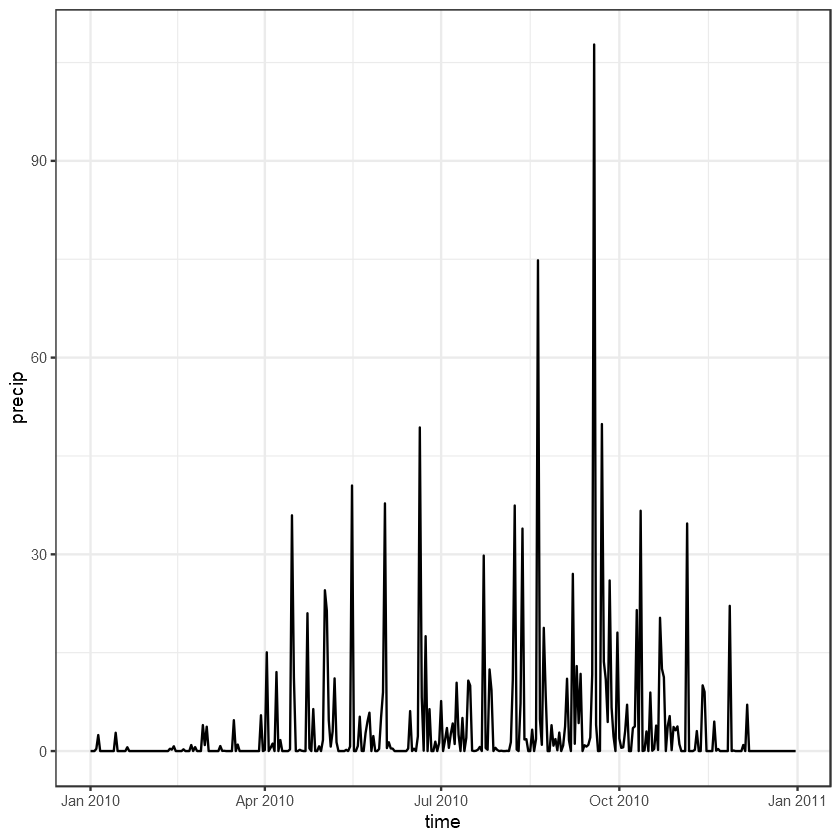

In [15]:
precip = data.frame(time=as.Date('1900-1-1')+hours(time),precip=precip_array)

precip %>% ggplot() +
    geom_path(aes(x=time,y=precip)) +
    theme_bw()

In [16]:
#function to get the list of Fridays for a given year
getFridays = function(year,is_the_first_weekday_Monday=TRUE) {
    starting_date = if_else((as.POSIXlt((year-1)%&%'-12-31')$wday-is_the_first_weekday_Monday)%%7<3,
                            as.Date(year%&%'-01-01'),as.Date(year%&%'-01-06'))
    finishing_date = if_else((as.POSIXlt(year%&%'-12-31')$wday-is_the_first_weekday_Monday)%%7<3,
                            as.Date(year%&%'-12-31'),as.Date((year+1)%&%'-01-04'))
    return(seq(starting_date,finishing_date,'days')%>%.[weekdays(.)=='Friday']) }

dfDates = data.frame(time=getFridays(ncyear %>% as.numeric)) %>% 
    mutate(Week = 1:n(),Year=as.numeric(ncyear))

dfDates %<>% right_join(precip) 

Joining, by = "time"


In [17]:
dfDates %>% na.locf(fromLast=TRUE) %>% head(10)

time,Week,Year,precip
2010-01-01,1,2010,0.0000000
2010-01-02,1,2010,0.0000000
2010-01-03,1,2010,0.0000000
2010-01-04,1,2010,0.3363662
2010-01-05,1,2010,2.4493315
2010-01-06,1,2010,0.0000000
2010-01-07,1,2010,0.0000000
2010-01-08,1,2010,0.0000000
2010-01-09,2,2010,0.0000000
2010-01-10,2,2010,0.0000000


In [18]:
nc_close(ncin)

# Now for all years

In [19]:
dir(ncpath, pattern = "precip", full.names = FALSE, ignore.case = TRUE) -> datafiles
datafiles

[1] "precip.2007.nc" "precip.2008.nc" "precip.2009.nc" "precip.2010.nc"
 [5] "precip.2011.nc" "precip.2012.nc" "precip.2013.nc" "precip.2014.nc"
 [9] "precip.2015.nc" "precip.2016.nc" "precip.2017.nc" "precip.2018.nc"

In [20]:
Precip = data.frame()
for (fl in datafiles) {
    message(fl)
    str_ = strsplit(fl,'[.]')[[1]]
    ncyear = str_[length(str_)-1]
    ncfname = paste0(ncpath, "/precip.", ncyear, ".nc")
    ncin = nc_open(ncfname)
    
    time = ncvar_get(ncin,"time")
    
    lon = ncvar_get(ncin,"lon")
    lat = ncvar_get(ncin,"lat")
    x = which.min(abs(as.numeric(dfGeo$lat)-lat))
    y = which.min(abs(as.numeric(dfGeo$lon)-lon))
    
    # get values
    data_array = ncvar_get(ncin,"precip")[y,x,]
    fillvalue = ncatt_get(ncin,"precip","_FillValue")
    # replace netCDF fill values with NA's
    data_array[data_array==fillvalue$value] = 0
    
    data_ = data.frame(Date=as.Date('1900-1-1')+hours(time),Precip=data_array)
    
    Precip %<>% bind_rows(data_)
    
    nc_close(ncin) 
}

precip.2007.nc
precip.2008.nc
precip.2009.nc
precip.2010.nc
precip.2011.nc
precip.2012.nc
precip.2013.nc
precip.2014.nc
precip.2015.nc
precip.2016.nc
precip.2017.nc
precip.2018.nc


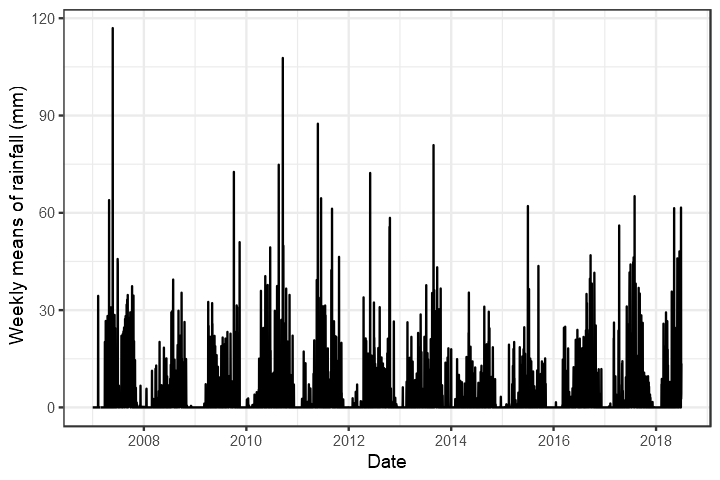

In [21]:
options(repr.plot.width=6,repr.plot.height=4)
Precip %>%
    ggplot() +
    geom_path(aes(x=Date,y=Precip)) +
    labs(y="Weekly means of rainfall (mm)") +
    theme_bw()

# Specific humidity

In [22]:
# set path and filename
ncpath <- "../data/Climate/Specific humidity"
dir(ncpath, pattern = "shum", full.names = FALSE, ignore.case = TRUE) -> datafiles
datafiles

[1] "shum.2m.gauss.2007.nc" "shum.2m.gauss.2008.nc" "shum.2m.gauss.2009.nc"
 [4] "shum.2m.gauss.2010.nc" "shum.2m.gauss.2011.nc" "shum.2m.gauss.2012.nc"
 [7] "shum.2m.gauss.2013.nc" "shum.2m.gauss.2014.nc" "shum.2m.gauss.2015.nc"
[10] "shum.2m.gauss.2016.nc" "shum.2m.gauss.2017.nc" "shum.2m.gauss.2018.nc"

In [23]:
Shum = data.frame()
for (fl in datafiles) {
    message(fl)
    str_ = strsplit(fl,'[.]')[[1]]
    ncyear = str_[length(str_)-1]
    ncfname = paste0(ncpath, "/shum.2m.gauss.", ncyear, ".nc")
    ncin = nc_open(ncfname)
    
    time = ncvar_get(ncin,"time")
    
    lon = ncvar_get(ncin,"lon")
    lat = ncvar_get(ncin,"lat")
    x = which.min(abs(as.numeric(dfGeo$lat)-lat))
    y = which.min(abs(as.numeric(dfGeo$lon)-lon))
    
    # get values
    data_array = ncvar_get(ncin,"shum")[y,x,]
    fillvalue = ncatt_get(ncin,"shum","_FillValue")
    # replace netCDF fill values with NA's
    data_array[data_array==fillvalue$value] = 0
    
    data_ = data.frame(Date=as.Date('1800-1-1')+hours(time),SH=data_array)
    
    Shum %<>% bind_rows(data_)
    
    nc_close(ncin) 
}

shum.2m.gauss.2007.nc
shum.2m.gauss.2008.nc
shum.2m.gauss.2009.nc
shum.2m.gauss.2010.nc
shum.2m.gauss.2011.nc
shum.2m.gauss.2012.nc
shum.2m.gauss.2013.nc
shum.2m.gauss.2014.nc
shum.2m.gauss.2015.nc
shum.2m.gauss.2016.nc
shum.2m.gauss.2017.nc
shum.2m.gauss.2018.nc


In [24]:
Shum %>% left_join(Precip) -> df
df %>% head

Joining, by = "Date"


Date,SH,Precip
2007-01-01,0.009100020,0
2007-01-02,0.007780015,0
2007-01-03,0.010300010,0
2007-01-04,0.011230022,0
2007-01-05,0.011180013,0
2007-01-06,0.012950033,0


# Temperature

In [25]:
# set path and filename
ncpath <- "../data/Climate/Temperature"
dir(ncpath, pattern = "air", full.names = FALSE, ignore.case = TRUE) -> datafiles
datafiles

[1] "air.2m.gauss.2007.nc" "air.2m.gauss.2008.nc" "air.2m.gauss.2009.nc"
 [4] "air.2m.gauss.2010.nc" "air.2m.gauss.2011.nc" "air.2m.gauss.2012.nc"
 [7] "air.2m.gauss.2013.nc" "air.2m.gauss.2014.nc" "air.2m.gauss.2015.nc"
[10] "air.2m.gauss.2016.nc" "air.2m.gauss.2017.nc" "air.2m.gauss.2018.nc"

In [26]:
Temp = data.frame()
for (fl in datafiles) {
    message(fl)
    str_ = strsplit(fl,'[.]')[[1]]
    ncyear = str_[length(str_)-1]
    ncfname = paste0(ncpath, "/air.2m.gauss.", ncyear, ".nc")
    ncin = nc_open(ncfname)
    
    time = ncvar_get(ncin,"time")
    
    lon = ncvar_get(ncin,"lon")
    lat = ncvar_get(ncin,"lat")
    x = which.min(abs(as.numeric(dfGeo$lat)-lat))
    y = which.min(abs(as.numeric(dfGeo$lon)-lon))
    
    # get values
    data_array = ncvar_get(ncin,"air")[y,x,]
    fillvalue = ncatt_get(ncin,"air","_FillValue")
    # replace netCDF fill values with NA's
    data_array[data_array==fillvalue$value] = 0
    
    data_ = data.frame(Date=as.Date('1800-1-1')+hours(time),T=data_array)
    
    Temp %<>% bind_rows(data_)
    
    nc_close(ncin) 
}

air.2m.gauss.2007.nc
air.2m.gauss.2008.nc
air.2m.gauss.2009.nc
air.2m.gauss.2010.nc
air.2m.gauss.2011.nc
air.2m.gauss.2012.nc
air.2m.gauss.2013.nc
air.2m.gauss.2014.nc
air.2m.gauss.2015.nc
air.2m.gauss.2016.nc
air.2m.gauss.2017.nc
air.2m.gauss.2018.nc


In [27]:
df %<>% left_join(Temp)
df %>% head

Joining, by = "Date"


Date,SH,Precip,T
2007-01-01,0.009100020,0,294.83
2007-01-02,0.007780015,0,295.03
2007-01-03,0.010300010,0,296.23
2007-01-04,0.011230022,0,297.43
2007-01-05,0.011180013,0,297.03
2007-01-06,0.012950033,0,295.50


# Relative humidity

In [28]:
# set path and filename
ncpath <- "../data/Climate/Relative humidity"
dir(ncpath, pattern = ".nc", full.names = FALSE, ignore.case = TRUE) -> datafiles
datafiles

[1] "rhum.sig995.2007.nc" "rhum.sig995.2008.nc" "rhum.sig995.2009.nc"
 [4] "rhum.sig995.2010.nc" "rhum.sig995.2011.nc" "rhum.sig995.2012.nc"
 [7] "rhum.sig995.2013.nc" "rhum.sig995.2014.nc" "rhum.sig995.2015.nc"
[10] "rhum.sig995.2016.nc" "rhum.sig995.2017.nc" "rhum.sig995.2018.nc"

In [29]:
RH = data.frame()
for (fl in datafiles) {
    message(fl)
    str_ = strsplit(fl,'[.]')[[1]]
    ncyear = str_[length(str_)-1]
    ncfname = paste0(ncpath, "/rhum.sig995.", ncyear, ".nc")
    ncin = nc_open(ncfname)
    
    time = ncvar_get(ncin,"time")
    
    lon = ncvar_get(ncin,"lon")
    lat = ncvar_get(ncin,"lat")
    x = which.min(abs(as.numeric(dfGeo$lat)-lat))
    y = which.min(abs(as.numeric(dfGeo$lon)-lon))
    
    # get values
    data_array = ncvar_get(ncin,"rhum")[y,x,]
    fillvalue = ncatt_get(ncin,"rhum","_FillValue")
    # replace netCDF fill values with NA's
    data_array[data_array==fillvalue$value] = 0
    
    data_ = data.frame(Date=as.Date('1800-1-1')+hours(time),RH=data_array)
    
    RH %<>% bind_rows(data_)
    
    nc_close(ncin) 
}

rhum.sig995.2007.nc
rhum.sig995.2008.nc
rhum.sig995.2009.nc
rhum.sig995.2010.nc
rhum.sig995.2011.nc
rhum.sig995.2012.nc
rhum.sig995.2013.nc
rhum.sig995.2014.nc
rhum.sig995.2015.nc
rhum.sig995.2016.nc
rhum.sig995.2017.nc
rhum.sig995.2018.nc


In [30]:
df %<>% left_join(RH)
df %>% head

Joining, by = "Date"


Date,SH,Precip,T,RH
2007-01-01,0.009100020,0,294.83,43.50
2007-01-02,0.007780015,0,295.03,31.00
2007-01-03,0.010300010,0,296.23,36.75
2007-01-04,0.011230022,0,297.43,40.75
2007-01-05,0.011180013,0,297.03,42.75
2007-01-06,0.012950033,0,295.50,35.00


# Precipitable water

In [31]:
# set path and filename
ncpath <- "../data/Climate/Precipitable water"
dir(ncpath, pattern = ".nc", full.names = FALSE, ignore.case = TRUE) -> datafiles
datafiles

[1] "pr_wtr.eatm.2007.nc" "pr_wtr.eatm.2008.nc" "pr_wtr.eatm.2009.nc"
 [4] "pr_wtr.eatm.2010.nc" "pr_wtr.eatm.2011.nc" "pr_wtr.eatm.2012.nc"
 [7] "pr_wtr.eatm.2013.nc" "pr_wtr.eatm.2014.nc" "pr_wtr.eatm.2015.nc"
[10] "pr_wtr.eatm.2016.nc" "pr_wtr.eatm.2017.nc" "pr_wtr.eatm.2018.nc"

In [32]:
PW = data.frame()
for (fl in datafiles) {
    message(fl)
    str_ = strsplit(fl,'[.]')[[1]]
    ncyear = str_[length(str_)-1]
    ncfname = paste0(ncpath, "/pr_wtr.eatm.", ncyear, ".nc")
    ncin = nc_open(ncfname)
    
    time = ncvar_get(ncin,"time")
    
    lon = ncvar_get(ncin,"lon")
    lat = ncvar_get(ncin,"lat")
    x = which.min(abs(as.numeric(dfGeo$lat)-lat))
    y = which.min(abs(as.numeric(dfGeo$lon)-lon))
    
    # get values
    data_array = ncvar_get(ncin,"pr_wtr")[y,x,]
    fillvalue = ncatt_get(ncin,"pr_wtr","_FillValue")
    # replace netCDF fill values with NA's
    data_array[data_array==fillvalue$value] = 0
    
    data_ = data.frame(Date=as.Date('1800-1-1')+hours(time),PW=data_array)
    
    PW %<>% bind_rows(data_)
    
    nc_close(ncin) 
}

PW %>% head

pr_wtr.eatm.2007.nc
pr_wtr.eatm.2008.nc
pr_wtr.eatm.2009.nc
pr_wtr.eatm.2010.nc
pr_wtr.eatm.2011.nc
pr_wtr.eatm.2012.nc
pr_wtr.eatm.2013.nc
pr_wtr.eatm.2014.nc
pr_wtr.eatm.2015.nc
pr_wtr.eatm.2016.nc
pr_wtr.eatm.2017.nc
pr_wtr.eatm.2018.nc


Date,PW
2007-01-01,26.72
2007-01-02,21.84
2007-01-03,19.47
2007-01-04,23.02
2007-01-05,23.97
2007-01-06,22.42


In [33]:
df %<>% left_join(PW)
df %>% head

Joining, by = "Date"


Date,SH,Precip,T,RH,PW
2007-01-01,0.009100020,0,294.83,43.50,26.72
2007-01-02,0.007780015,0,295.03,31.00,21.84
2007-01-03,0.010300010,0,296.23,36.75,19.47
2007-01-04,0.011230022,0,297.43,40.75,23.02
2007-01-05,0.011180013,0,297.03,42.75,23.97
2007-01-06,0.012950033,0,295.50,35.00,22.42


# Adding the date

In [34]:
Calendar = data.frame()
for (yr in Precip$Date %>% year %>% unique) {
    df_ = data.frame(Date=getFridays(yr)) %>% 
        mutate(Week = 1:n(),Year=as.numeric(yr))
    
    Calendar %<>% bind_rows(df_)
}

Calendar %>% head

df %>%
    mutate(Date=Date %>% as.Date) %>%
    left_join(Calendar,by="Date") %>%
    na.locf(fromLast=TRUE) %>%
    # to omit last records fallen in an incomplete week
    na.omit %>%
    group_by(Week,Year) %>%
    summarize(Precip=mean(Precip %>% as.numeric),
              T = mean(T %>% as.numeric)-273,
              SH = mean(SH %>% as.numeric),
              RH = mean(RH %>% as.numeric),
              PW = mean(PW %>% as.numeric),
              Date=max(Date %>% as.Date)) %>%
    ungroup %>%
    mutate(Year=as.numeric(Year),Week=as.numeric(Week)) %>%
    arrange(Year,Week) -> df_

df_ %>% head(10)

Date,Week,Year
2007-01-12,1,2007
2007-01-19,2,2007
2007-01-26,3,2007
2007-02-02,4,2007
2007-02-09,5,2007
2007-02-16,6,2007


Week,Year,Precip,T,SH,RH,PW,Date
1,2007,0.000000,22.23000,0.010799184,33.29167,19.32500,2007-01-12
2,2007,0.000000,22.45143,0.009207164,29.64286,15.30857,2007-01-19
3,2007,0.000000,27.85571,0.014837163,51.53571,30.55714,2007-01-26
4,2007,0.000000,30.02571,0.014787163,51.92857,30.00000,2007-02-02
5,2007,4.915879,29.02714,0.015970017,62.25000,33.70000,2007-02-09
6,2007,0.000000,27.20429,0.017200023,71.28571,33.67000,2007-02-16
7,2007,0.000000,26.90285,0.019710021,73.71429,38.97285,2007-02-23
8,2007,0.000000,26.45429,0.018741446,71.71429,34.73571,2007-03-02
9,2007,0.000000,29.27856,0.015724310,48.21429,28.65000,2007-03-09
10,2007,0.000000,26.57428,0.019592881,79.07143,41.49286,2007-03-16


# Adding incidence data

In [35]:
yearMin = 2016

Df = read_excel("../data/Nigeria_raw.xlsx", sheet = "Incidence") %>%
    select(-one_of("Timeseries","Imputation","File in the repo"),-contains("URL")) %>%
    filter(Year>=yearMin) %>%
    group_by(Year) %>%
    mutate(Incidence_Reported = if_else(Week==1,Reported,Reported-lead(Reported)), 
           Incidence_Deaths = if_else(Week==1,Deaths,Deaths-lead(Deaths))
          ) %>%
    ungroup

Df

Year,Week,LGAs,States,Reported,Deaths,Confirmed,Positive_Incidence,Negative_Incidence,Incidence_Reported,Incidence_Deaths
2018,30,NA,NA,926,68,225,NA,NA,16,0
2018,29,NA,NA,910,68,220,NA,NA,33,3
2018,28,NA,NA,877,65,214,NA,NA,15,1
2018,27,141,29,862,64,209,5,15,20,2
2018,26,141,29,842,62,204,2,10,12,0
2018,25,141,29,830,62,202,6,18,24,2
2018,24,141,29,806,60,196,1,5,6,0
2018,23,141,29,800,60,195,1,3,4,0
2018,22,141,29,796,60,194,1,4,5,0
2018,21,137,29,791,60,193,NA,NA,0,0


In [36]:
Df %>% 
    select(Year,Week,Reported) %>%
    rename(Incidence=Reported) %>%
    full_join(df_) %>%
    arrange(Date) %>%
    select(-Year,-Week) %>%
    select(Date,everything()) -> df.in

df.in

Joining, by = c("Year", "Week")


Date,Incidence,Precip,T,SH,RH,PW
2007-01-12,NA,0.0000000,22.23000,0.010799184,33.29167,19.32500
2007-01-19,NA,0.0000000,22.45143,0.009207164,29.64286,15.30857
2007-01-26,NA,0.0000000,27.85571,0.014837163,51.53571,30.55714
2007-02-02,NA,0.0000000,30.02571,0.014787163,51.92857,30.00000
2007-02-09,NA,4.9158794,29.02714,0.015970017,62.25000,33.70000
2007-02-16,NA,0.0000000,27.20429,0.017200023,71.28571,33.67000
2007-02-23,NA,0.0000000,26.90285,0.019710021,73.71429,38.97285
2007-03-02,NA,0.0000000,26.45429,0.018741446,71.71429,34.73571
2007-03-09,NA,0.0000000,29.27856,0.015724310,48.21429,28.65000
2007-03-16,NA,0.0000000,26.57428,0.019592881,79.07143,41.49286


# CCM

In [37]:
#p-value threshold
pvalue = 0.99

In [38]:
# Machinery from Deyle, Sugihara

make_pred_nozero = function(time_series,E) {
    I_zero_strings = which(time_series==0)
    I_zero_strings = Reduce(intersect, lapply((0:E),function(offset) I_zero_strings-offset))
    I_zero_strings = c(0,I_zero_strings,NROW(df.in)) # for convenience in next step
    N_zero_strings = length(I_zero_strings)
    lib_nozeroes = cbind(I_zero_strings[1:(N_zero_strings-1)]+1,I_zero_strings[2:(N_zero_strings)]-1)
    lib_out = lib_nozeroes[which(lib_nozeroes[,2] > lib_nozeroes[,1]),]
    return(lib_out)
}
                                              
yearday_anom = function(t,x) {
    # t: date formatted with POSIXt
    # x: time-series values to compute seasonal mean and anomaly
    doy = as.numeric(strftime(t, format = "%j"))
    I_use = which(!is.na(x))
    # create time indices to use for smoothing, replicating data to "wrap around"
    doy_sm = rep(doy[I_use],3) + rep(c(-366,0,366),each=length(I_use))
    x_sm = rep(x[I_use],3)
    xsp = smooth.spline(doy_sm, y = x_sm, w = NULL, spar = 0.8, cv = NA,
        all.knots = TRUE,keep.data = TRUE, df.offset = 0)
    xbar = data.frame(t=t,doy=doy) %>%
        left_join(data.frame(doy=xsp$x,xbar=xsp$y),by='doy') %>%
        select(xbar)
    out = data.frame(t=t,mean=xbar,anomaly=(x - xbar))
    names(out) = c('date','mean','anomaly')
    return(out)
}

Warning message:
"Removed 5 rows containing missing values (geom_path)."Warning message:
"Removed 5 rows containing missing values (geom_point)."

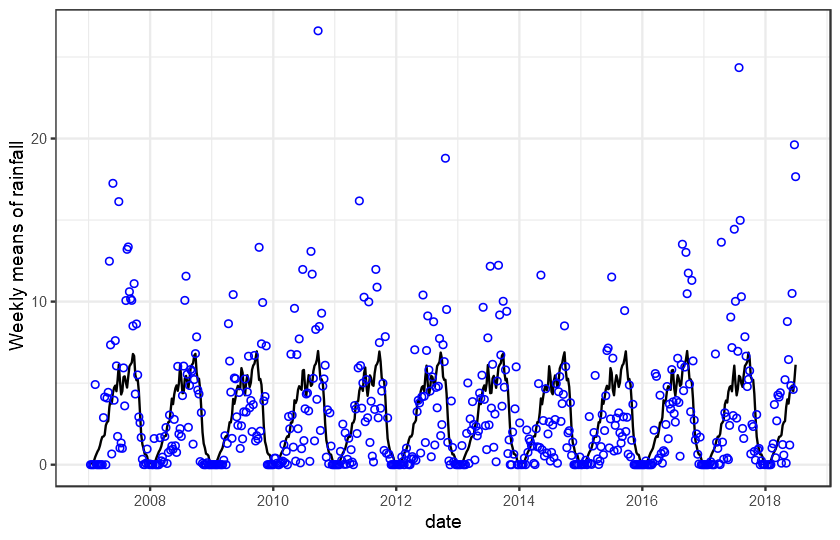

In [39]:
out = yearday_anom(df.in$Date,df.in$Precip)
Precip.bar = out$mean
Precip.tilde = out$anomaly

options(repr.plot.width=7,repr.plot.height=4.5)
out %>% 
    ggplot(aes(x=date)) +
        geom_line(aes(y=mean)) +
        geom_point(aes(y=mean+anomaly),color="blue",shape=1) +
        labs(x="date",y="Weekly means of rainfall") + theme_bw()

In [40]:
Precip.surrs = do.call(cbind,
    lapply(1:500, function(i) {
        I_na = is.na(Precip.tilde)
        out = Precip.bar
        out[I_na] = NA
        out[!I_na] = out[!I_na] + sample(Precip.tilde[!I_na],sum(!I_na),replace = FALSE)
        out[out<0] = 0
        return(out)
    })
)

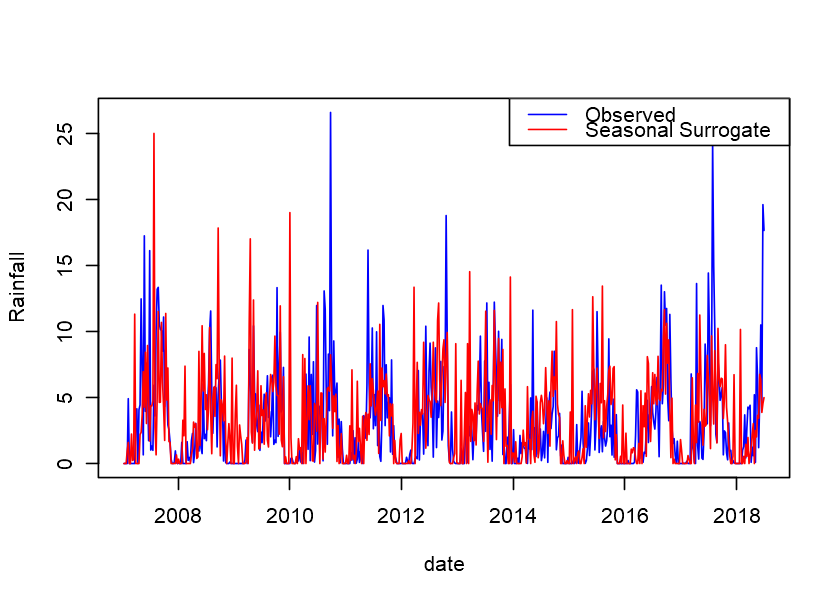

In [41]:
options(repr.plot.width=7,repr.plot.height=5)
plot(df.in$Date,df.in$Precip,type='l',col='blue',xlab='date',ylab='Rainfall')
lines(df.in$Date,Precip.surrs[,1],col='red')
legend( x="topright", legend=c("Observed","Seasonal Surrogate"), col=c("blue","red"), lwd=1, lty=c(1,1),bg='white')

In [42]:
block = df.in %>% select(Incidence,Precip)
lib_ccm = c(1,NROW(df.in))

Emax=8

out = do.call(
    rbind,
    lapply(1:Emax, function(E_i) {
        pred_ccm = make_pred_nozero(block$Incidence,E_i)
        ccm(block=block,
            E=E_i,
            lib=lib_ccm,
            pred=pred_ccm,
            lib_sizes = NROW(block),
            exclusion_radius=0,
            random_libs = FALSE,
            num_sample=1,
            tp = -1,
            lib_column = 1,
            target_column = 2, 
            silent = TRUE) }
    )
)

E_star = out$E[which.max(out$rho)]
E_star

out

[1] 6

E,tau,tp,nn,lib_column,target_column,lib_size,num_pred,rho,mae,rmse
1,1,-1,2,1,2,127,127,0.04964759,3.471412,5.619873
2,1,-1,3,1,2,126,126,0.27114865,3.249129,4.786189
3,1,-1,4,1,2,125,125,0.39168596,2.964918,4.408912
4,1,-1,5,1,2,124,124,0.47763278,2.779107,4.106379
5,1,-1,6,1,2,123,123,0.55031192,2.641272,3.838116
6,1,-1,7,1,2,122,122,0.61529092,2.547894,3.582941
7,1,-1,8,1,2,121,121,0.60184907,2.631283,3.632135
8,1,-1,9,1,2,120,120,0.57544674,2.678543,3.751735


In [43]:
pred_ccm = make_pred_nozero(block$Incidence,E_star)
df.out.ccm = ccm(block=block,
                    E=E_star,
                    lib=lib_ccm,
                    pred = pred_ccm,
                    lib_sizes = NROW(block),
                    exclusion_radius=0,
                    random_libs = FALSE,
                    num_sample=1,
                    tp = 0, 
                    silent = TRUE)
df.out.ccm

E,tau,tp,nn,lib_column,target_column,lib_size,num_pred,rho,mae,rmse
6,1,0,7,1,2,121,121,0.6033615,2.639755,3.645344


In [44]:
df.out.ccm.surr = data.frame()

for (i_surr in 1:dim(Precip.surrs)[2]) {
    block = data.frame(Incidence=df.in$Incidence,Precip=Precip.surrs[,i_surr])
    out = do.call(
        rbind,
        lapply(1:8, function(E_i){
            pred_ccm = make_pred_nozero(block$Incidence,E_i)
            ccm(block=block,
                E=E_i,
                lib=lib_ccm,
                pred=pred_ccm,
                lib_sizes = NROW(block),
                exclusion_radius=0,
                random_libs = FALSE,
                num_sample=1,
                tp = -1,
                lib_column = 1,
                target_column = 2, 
                silent=TRUE)
            }
        )
    )
    
    E_star = out$E[which.max(out$rho)]
    pred_ccm = make_pred_nozero(block$Incidence,E_star)
    out = ccm(block = block,
                    E = E_star,
                    lib = lib_ccm,
                    pred = pred_ccm,
                    lib_sizes = NROW(block),
                    exclusion_radius = 0,
                    random_libs = FALSE,
                    num_sample=1,
                    tp = 0,
                    silent=TRUE)
    df.out.ccm.surr <- df.out.ccm.surr %>% bind_rows(out)
}

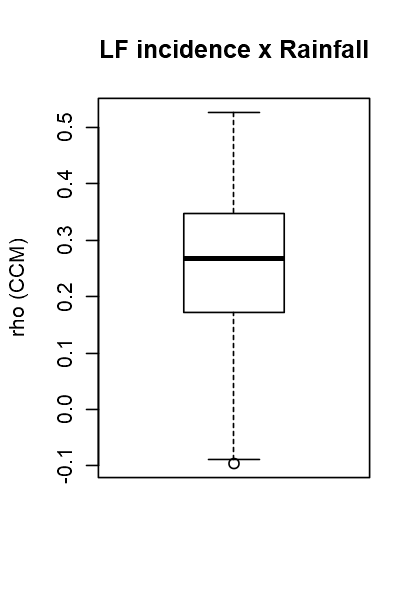

In [45]:
options(repr.plot.width=3.5,repr.plot.height=5)
boxplot(df.out.ccm.surr$rho, ylab='rho (CCM)', main='LF incidence x Rainfall')
points(1,df.out.ccm$rho, pch=8, col='red', cex=2, lwd=2)

In [46]:
qs=c(.025,.25, .5, .75,.975)
data.frame(value=quantile(df.out.ccm.surr$rho,qs)) -> output
output$names <- paste0("q",rownames(output))
output %<>%
    mutate(names=substr(names,1,nchar(names)-1)) %>%
    spread(names,value) %>%
    mutate(rho.ccm=df.out.ccm$rho, 
           sign=df.out.ccm$rho>quantile(df.out.ccm.surr$rho,pvalue)[[1]])
output

q2.5,q25,q50,q75,q97.5,rho.ccm,sign
0.002525495,0.1720166,0.2673849,0.3471649,0.4655471,0.6033615,TRUE


In [47]:
output %>% as.data.frame %>% mutate(class="Rainfall") %>% select(class,everything()) -> DfOutput
DfOutput

class,q2.5,q25,q50,q75,q97.5,rho.ccm,sign
Rainfall,0.002525495,0.1720166,0.2673849,0.3471649,0.4655471,0.6033615,TRUE


# The same for temperature

Warning message:
"Removed 5 rows containing missing values (geom_path)."Warning message:
"Removed 5 rows containing missing values (geom_point)."

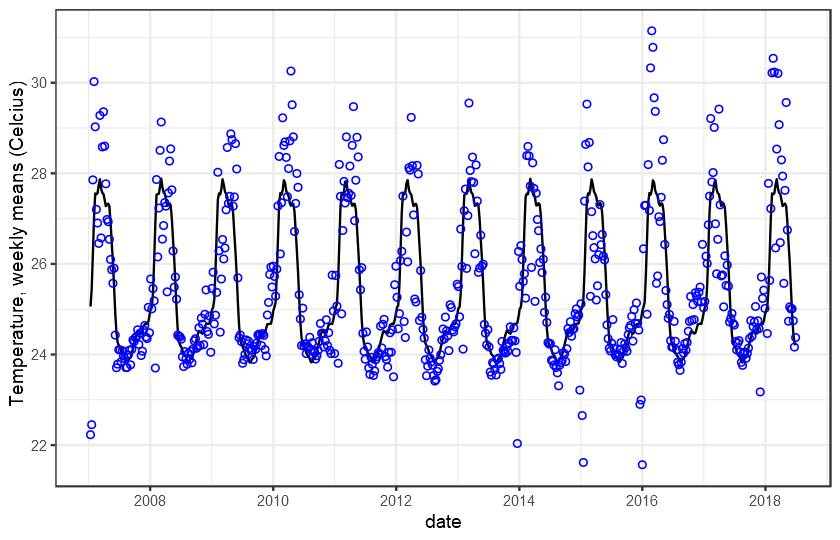

In [48]:
out = yearday_anom(df.in$Date,df.in$T)
Temp.bar = out$mean
Temp.tilde = out$anomaly

options(repr.plot.width=7,repr.plot.height=4.5)
out %>% 
    ggplot(aes(x=date)) +
        geom_line(aes(y=mean)) +
        geom_point(aes(y=mean+anomaly),color="blue",shape=1) +
        labs(x="date",y="Temperature, weekly means (Celcius)") + theme_bw()

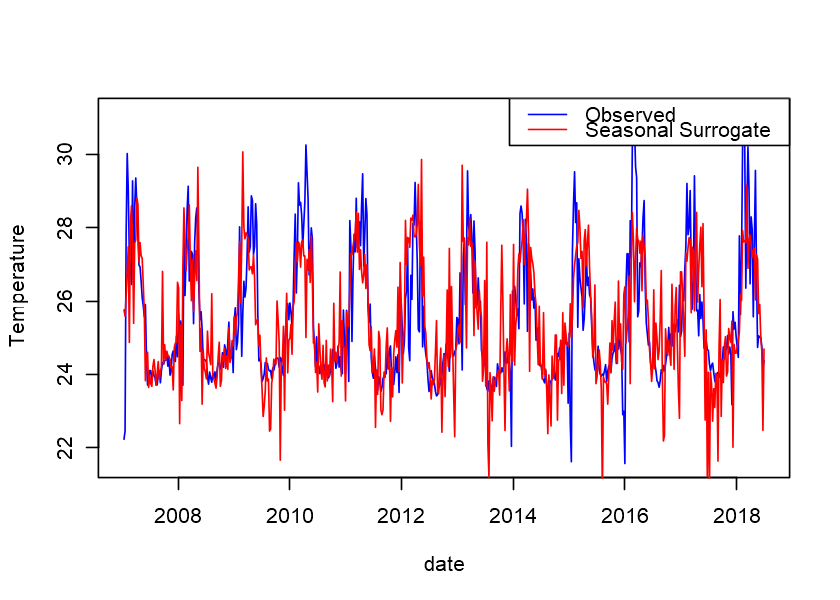

In [49]:
Surrs = do.call(cbind,
    lapply(1:500, function(i) {
        I_na = is.na(Temp.tilde)
        out = Temp.bar
        out[I_na] = NA
        out[!I_na] = out[!I_na] + sample(Temp.tilde[!I_na],sum(!I_na),replace = FALSE)
        return(out)
    })
)

options(repr.plot.width=7,repr.plot.height=5)
plot(df.in$Date,df.in$T,type='l',col='blue',xlab='date',ylab='Temperature')
lines(df.in$Date,Surrs[,1],col='red')
legend( x="topright", legend=c("Observed","Seasonal Surrogate"), col=c("blue","red"), lwd=1, lty=c(1,1),bg='white')

In [50]:
block = df.in %>% select(Incidence,T)
lib_ccm = c(1,NROW(df.in))

Emax=8

out = do.call(
    rbind,
    lapply(1:Emax, function(E_i) {
        pred_ccm = make_pred_nozero(block$Incidence,E_i)
        ccm(block=block,
            E=E_i,
            lib=lib_ccm,
            pred=pred_ccm,
            lib_sizes = NROW(block),
            exclusion_radius=0,
            random_libs = FALSE,
            num_sample=1,
            tp = -1,
            lib_column = 1,
            target_column = 2, 
            silent = TRUE) }
    )
)

E_star = out$E[which.max(out$rho)]
E_star

out

[1] 8

E,tau,tp,nn,lib_column,target_column,lib_size,num_pred,rho,mae,rmse
1,1,-1,2,1,2,127,127,0.2023439,1.485789,2.279022
2,1,-1,3,1,2,126,126,0.1433345,1.505520,2.233923
3,1,-1,4,1,2,125,125,0.1793805,1.422956,2.092128
4,1,-1,5,1,2,124,124,0.2050393,1.356434,2.016179
5,1,-1,6,1,2,123,123,0.3588417,1.217899,1.822419
6,1,-1,7,1,2,122,122,0.4240907,1.133713,1.704452
7,1,-1,8,1,2,121,121,0.4588226,1.069638,1.610734
8,1,-1,9,1,2,120,120,0.4844513,1.004151,1.543336


In [51]:
pred_ccm = make_pred_nozero(block$Incidence,E_star)
df.out.ccm = ccm(block=block,
                    E=E_star,
                    lib=lib_ccm,
                    pred = pred_ccm,
                    lib_sizes = NROW(block),
                    exclusion_radius=0,
                    random_libs = FALSE,
                    num_sample=1,
                    tp = 0, 
                    silent = TRUE)
df.out.ccm

E,tau,tp,nn,lib_column,target_column,lib_size,num_pred,rho,mae,rmse
8,1,0,9,1,2,119,119,0.5683424,0.9403041,1.430387


In [52]:
df.out.ccm.surr = data.frame()

for (i_surr in 1:dim(Surrs)[2]) {
    block = data.frame(Incidence=df.in$Incidence,T=Surrs[,i_surr])
    out = do.call(
        rbind,
        lapply(1:8, function(E_i){
            pred_ccm = make_pred_nozero(block$Incidence,E_i)
            ccm(block=block,
                E=E_i,
                lib=lib_ccm,
                pred=pred_ccm,
                lib_sizes = NROW(block),
                exclusion_radius=0,
                random_libs = FALSE,
                num_sample=1,
                tp = -1,
                lib_column = 1,
                target_column = 2, 
                silent=TRUE)
            }
        )
    )
    
    E_star = out$E[which.max(out$rho)]
    pred_ccm = make_pred_nozero(block$Incidence,E_star)
    out = ccm(block = block,
                    E = E_star,
                    lib = lib_ccm,
                    pred = pred_ccm,
                    lib_sizes = NROW(block),
                    exclusion_radius = 0,
                    random_libs = FALSE,
                    num_sample=1,
                    tp = 0,
                    silent=TRUE)
    df.out.ccm.surr <- df.out.ccm.surr %>% bind_rows(out)
}

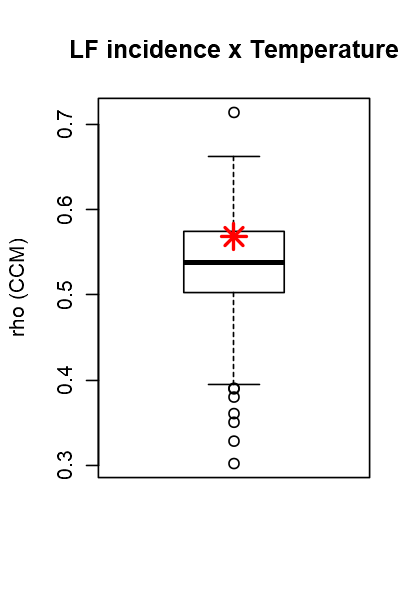

In [53]:
options(repr.plot.width=3.5,repr.plot.height=5)
boxplot(df.out.ccm.surr$rho, ylab='rho (CCM)', main='LF incidence x Temperature')
points(1,df.out.ccm$rho, pch=8, col='red', cex=2, lwd=2)

In [54]:
qs=c(.025,.25, .5, .75,.975)
data.frame(value=quantile(df.out.ccm.surr$rho,qs)) -> output
output$names <- paste0("q",rownames(output))
output %<>%
    mutate(names=substr(names,1,nchar(names)-1)) %>%
    spread(names,value) %>%
    mutate(rho.ccm=df.out.ccm$rho, 
           sign=df.out.ccm$rho>quantile(df.out.ccm.surr$rho,pvalue)[[1]])
output

q2.5,q25,q50,q75,q97.5,rho.ccm,sign
0.4321795,0.5028743,0.5375643,0.5743774,0.6329438,0.5683424,FALSE


In [55]:
output %>% as.data.frame %>% mutate(class="Temperature") %>% select(class,everything()) %>% bind_rows(DfOutput) -> DfOutput
DfOutput

class,q2.5,q25,q50,q75,q97.5,rho.ccm,sign
Temperature,0.432179542,0.5028743,0.5375643,0.5743774,0.6329438,0.5683424,FALSE
Rainfall,0.002525495,0.1720166,0.2673849,0.3471649,0.4655471,0.6033615,TRUE


# Specific humidity

Warning message:
"Removed 5 rows containing missing values (geom_path)."Warning message:
"Removed 5 rows containing missing values (geom_point)."

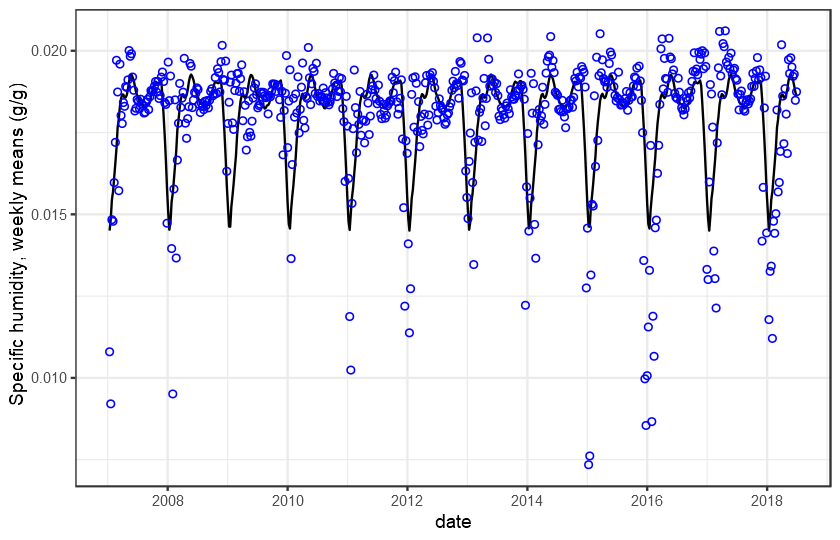

In [56]:
out = yearday_anom(df.in$Date,df.in$SH)
SH.bar = out$mean
SH.tilde = out$anomaly

options(repr.plot.width=7,repr.plot.height=4.5)
out %>% 
    ggplot(aes(x=date)) +
        geom_line(aes(y=mean)) +
        geom_point(aes(y=mean+anomaly),color="blue",shape=1) +
        labs(x="date",y="Specific humidity, weekly means (g/g)") + theme_bw()

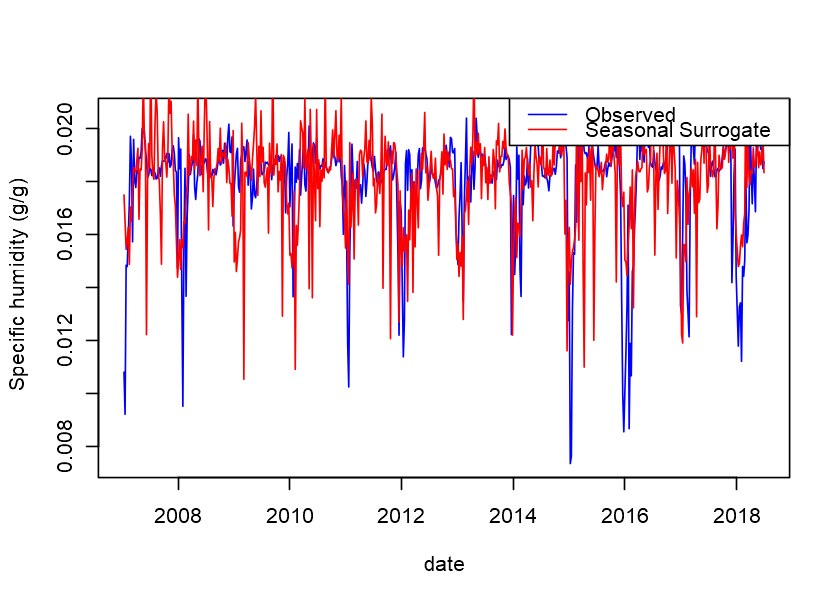

In [57]:
Surrs = do.call(cbind,
    lapply(1:500, function(i) {
        I_na = is.na(SH.tilde)
        out = SH.bar
        out[I_na] = NA
        out[!I_na] = out[!I_na] + sample(SH.tilde[!I_na],sum(!I_na),replace = FALSE)
        out[out<0] = 0
        return(out)
    })
)

options(repr.plot.width=7,repr.plot.height=5)
plot(df.in$Date,df.in$SH,type='l',col='blue',xlab='date',ylab='Specific humidity (g/g)')
lines(df.in$Date,Surrs[,1],col='red')
legend( x="topright", legend=c("Observed","Seasonal Surrogate"), col=c("blue","red"), lwd=1, lty=c(1,1),bg='white')

In [58]:
block = df.in %>% select(Incidence,SH)
lib_ccm = c(1,NROW(df.in))

Emax=8

out = do.call(
    rbind,
    lapply(1:Emax, function(E_i) {
        pred_ccm = make_pred_nozero(block$Incidence,E_i)
        ccm(block=block,
            E=E_i,
            lib=lib_ccm,
            pred=pred_ccm,
            lib_sizes = NROW(block),
            exclusion_radius=0,
            random_libs = FALSE,
            num_sample=1,
            tp = -1,
            lib_column = 1,
            target_column = 2, 
            silent = TRUE) }
    )
)

E_star = out$E[which.max(out$rho)]
E_star

out

[1] 5

E,tau,tp,nn,lib_column,target_column,lib_size,num_pred,rho,mae,rmse
1,1,-1,2,1,2,127,127,0.3499575,0.001643534,0.002633886
2,1,-1,3,1,2,126,126,0.4348699,0.001458661,0.002323458
3,1,-1,4,1,2,125,125,0.5080321,0.001281860,0.001991800
4,1,-1,5,1,2,124,124,0.5869562,0.001162356,0.001768357
5,1,-1,6,1,2,123,123,0.6047928,0.001084715,0.001652488
6,1,-1,7,1,2,122,122,0.5469215,0.001102216,0.001730561
7,1,-1,8,1,2,121,121,0.5902788,0.001026260,0.001652172
8,1,-1,9,1,2,120,120,0.5799653,0.001027429,0.001676749


In [59]:
pred_ccm = make_pred_nozero(block$Incidence,E_star)
df.out.ccm = ccm(block=block,
                    E=E_star,
                    lib=lib_ccm,
                    pred = pred_ccm,
                    lib_sizes = NROW(block),
                    exclusion_radius=0,
                    random_libs = FALSE,
                    num_sample=1,
                    tp = 0, 
                    silent = TRUE)
df.out.ccm

E,tau,tp,nn,lib_column,target_column,lib_size,num_pred,rho,mae,rmse
5,1,0,6,1,2,122,122,0.4137583,0.001229185,0.001913711


In [60]:
df.out.ccm.surr = data.frame()

for (i_surr in 1:dim(Surrs)[2]) {
    block = data.frame(Incidence=df.in$Incidence,SH=Surrs[,i_surr])
    out = do.call(
        rbind,
        lapply(1:8, function(E_i){
            pred_ccm = make_pred_nozero(block$Incidence,E_i)
            ccm(block=block,
                E=E_i,
                lib=lib_ccm,
                pred=pred_ccm,
                lib_sizes = NROW(block),
                exclusion_radius=0,
                random_libs = FALSE,
                num_sample=1,
                tp = -1,
                lib_column = 1,
                target_column = 2, 
                silent=TRUE)
            }
        )
    )
    
    E_star = out$E[which.max(out$rho)]
    pred_ccm = make_pred_nozero(block$Incidence,E_star)
    out = ccm(block = block,
                    E = E_star,
                    lib = lib_ccm,
                    pred = pred_ccm,
                    lib_sizes = NROW(block),
                    exclusion_radius = 0,
                    random_libs = FALSE,
                    num_sample=1,
                    tp = 0,
                    silent=TRUE)
    df.out.ccm.surr <- df.out.ccm.surr %>% bind_rows(out)
}

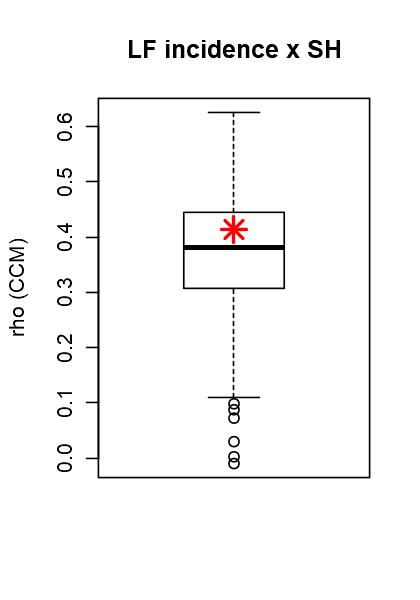

In [61]:
options(repr.plot.width=3.5,repr.plot.height=5)
boxplot(df.out.ccm.surr$rho, ylab='rho (CCM)', main='LF incidence x SH')
points(1,df.out.ccm$rho, pch=8, col='red', cex=2, lwd=2)

In [62]:
qs=c(.025,.25, .5, .75,.975)
data.frame(value=quantile(df.out.ccm.surr$rho,qs)) -> output
output$names <- paste0("q",rownames(output))
output %<>%
    mutate(names=substr(names,1,nchar(names)-1)) %>%
    spread(names,value) %>%
    mutate(rho.ccm=df.out.ccm$rho, 
           sign=df.out.ccm$rho>quantile(df.out.ccm.surr$rho,pvalue)[[1]])
output

q2.5,q25,q50,q75,q97.5,rho.ccm,sign
0.1431334,0.307154,0.381877,0.4447567,0.5696576,0.4137583,FALSE


In [63]:
output %>% as.data.frame %>% mutate(class="Specific humidity") %>% select(class,everything()) %>% bind_rows(DfOutput) -> DfOutput
DfOutput

class,q2.5,q25,q50,q75,q97.5,rho.ccm,sign
Specific humidity,0.143133424,0.3071540,0.3818770,0.4447567,0.5696576,0.4137583,FALSE
Temperature,0.432179542,0.5028743,0.5375643,0.5743774,0.6329438,0.5683424,FALSE
Rainfall,0.002525495,0.1720166,0.2673849,0.3471649,0.4655471,0.6033615,TRUE


# Relative humidity

Warning message:
"Removed 5 rows containing missing values (geom_path)."Warning message:
"Removed 5 rows containing missing values (geom_point)."

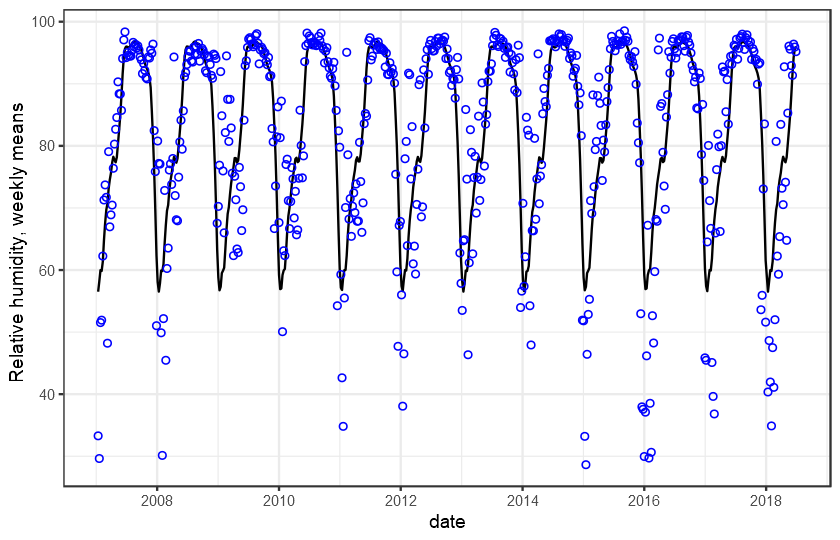

In [64]:
out = yearday_anom(df.in$Date,df.in$RH)
RH.bar = out$mean
RH.tilde = out$anomaly

options(repr.plot.width=7,repr.plot.height=4.5)
out %>% 
    ggplot(aes(x=date)) +
        geom_line(aes(y=mean)) +
        geom_point(aes(y=mean+anomaly),color="blue",shape=1) +
        labs(x="date",y="Relative humidity, weekly means") + theme_bw()

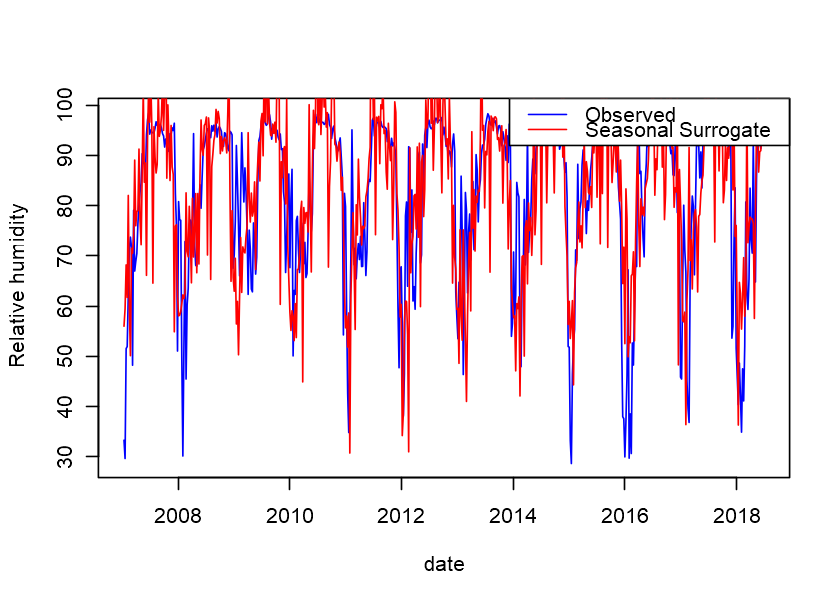

In [65]:
Surrs = do.call(cbind,
    lapply(1:500, function(i) {
        I_na = is.na(RH.tilde)
        out = RH.bar
        out[I_na] = NA
        out[!I_na] = out[!I_na] + sample(RH.tilde[!I_na],sum(!I_na),replace = FALSE)
        out[out<0] = 0
        return(out)
    })
)

options(repr.plot.width=7,repr.plot.height=5)
plot(df.in$Date,df.in$RH,type='l',col='blue',xlab='date',ylab='Relative humidity')
lines(df.in$Date,Surrs[,1],col='red')
legend(x="topright", legend=c("Observed","Seasonal Surrogate"), col=c("blue","red"), lwd=1, lty=c(1,1),bg='white')

In [66]:
block = df.in %>% select(Incidence,RH)
lib_ccm = c(1,NROW(df.in))

Emax=8

out = do.call(
    rbind,
    lapply(1:Emax, function(E_i) {
        pred_ccm = make_pred_nozero(block$Incidence,E_i)
        ccm(block=block,
            E=E_i,
            lib=lib_ccm,
            pred=pred_ccm,
            lib_sizes = NROW(block),
            exclusion_radius=0,
            random_libs = FALSE,
            num_sample=1,
            tp = -1,
            lib_column = 1,
            target_column = 2, 
            silent = TRUE) }
    )
)

E_star = out$E[which.max(out$rho)]
E_star

out

[1] 7

E,tau,tp,nn,lib_column,target_column,lib_size,num_pred,rho,mae,rmse
1,1,-1,2,1,2,127,127,0.2731831,14.851024,22.34235
2,1,-1,3,1,2,126,126,0.3570265,13.109862,19.92311
3,1,-1,4,1,2,125,125,0.4927131,11.703754,16.87347
4,1,-1,5,1,2,124,124,0.5622201,10.961307,15.40422
5,1,-1,6,1,2,123,123,0.6079682,10.004284,14.28180
6,1,-1,7,1,2,122,122,0.6156941,9.745261,14.08933
7,1,-1,8,1,2,121,121,0.6486991,9.252205,13.47077
8,1,-1,9,1,2,120,120,0.6372836,9.110709,13.73069


In [67]:
pred_ccm = make_pred_nozero(block$Incidence,E_star)
df.out.ccm = ccm(block=block,
                    E=E_star,
                    lib=lib_ccm,
                    pred = pred_ccm,
                    lib_sizes = NROW(block),
                    exclusion_radius=0,
                    random_libs = FALSE,
                    num_sample=1,
                    tp = 0, 
                    silent = TRUE)
df.out.ccm

E,tau,tp,nn,lib_column,target_column,lib_size,num_pred,rho,mae,rmse
7,1,0,8,1,2,120,120,0.6086548,9.269234,13.9872


In [68]:
df.out.ccm.surr = data.frame()

for (i_surr in 1:dim(Surrs)[2]) {
    block = data.frame(Incidence=df.in$Incidence,RH=Surrs[,i_surr])
    out = do.call(
        rbind,
        lapply(1:8, function(E_i){
            pred_ccm = make_pred_nozero(block$Incidence,E_i)
            ccm(block=block,
                E=E_i,
                lib=lib_ccm,
                pred=pred_ccm,
                lib_sizes = NROW(block),
                exclusion_radius=0,
                random_libs = FALSE,
                num_sample=1,
                tp = -1,
                lib_column = 1,
                target_column = 2, 
                silent=TRUE)
            }
        )
    )
    
    E_star = out$E[which.max(out$rho)]
    pred_ccm = make_pred_nozero(block$Incidence,E_star)
    out = ccm(block = block,
                    E = E_star,
                    lib = lib_ccm,
                    pred = pred_ccm,
                    lib_sizes = NROW(block),
                    exclusion_radius = 0,
                    random_libs = FALSE,
                    num_sample=1,
                    tp = 0,
                    silent=TRUE)
    df.out.ccm.surr <- df.out.ccm.surr %>% bind_rows(out)
}

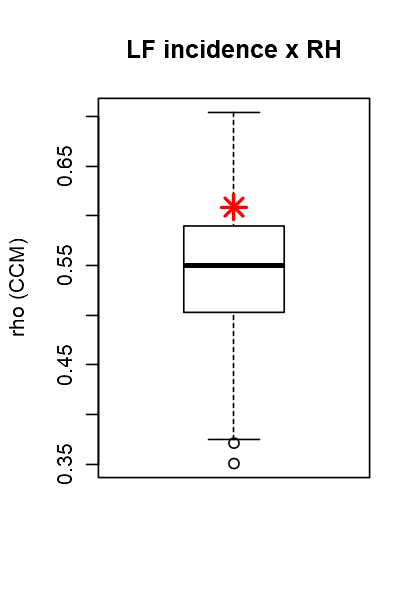

In [69]:
options(repr.plot.width=3.5,repr.plot.height=5)
boxplot(df.out.ccm.surr$rho, ylab='rho (CCM)', main='LF incidence x RH')
points(1,df.out.ccm$rho, pch=8, col='red', cex=2, lwd=2)

In [70]:
qs=c(.025,.25, .5, .75,.975)
data.frame(value=quantile(df.out.ccm.surr$rho,qs)) -> output
output$names <- paste0("q",rownames(output))
output %<>%
    mutate(names=substr(names,1,nchar(names)-1)) %>%
    spread(names,value) %>%
    mutate(rho.ccm=df.out.ccm$rho, 
           sign=df.out.ccm$rho>quantile(df.out.ccm.surr$rho,pvalue)[[1]])
output

q2.5,q25,q50,q75,q97.5,rho.ccm,sign
0.4065894,0.5027682,0.550303,0.5896395,0.6460035,0.6086548,FALSE


In [71]:
output %>% as.data.frame %>% mutate(class="Relative humidity") %>% select(class,everything()) %>% bind_rows(DfOutput) -> DfOutput
DfOutput

class,q2.5,q25,q50,q75,q97.5,rho.ccm,sign
Relative humidity,0.406589354,0.5027682,0.5503030,0.5896395,0.6460035,0.6086548,FALSE
Specific humidity,0.143133424,0.3071540,0.3818770,0.4447567,0.5696576,0.4137583,FALSE
Temperature,0.432179542,0.5028743,0.5375643,0.5743774,0.6329438,0.5683424,FALSE
Rainfall,0.002525495,0.1720166,0.2673849,0.3471649,0.4655471,0.6033615,TRUE


# Precipitable water

Warning message:
"Removed 5 rows containing missing values (geom_path)."Warning message:
"Removed 5 rows containing missing values (geom_point)."

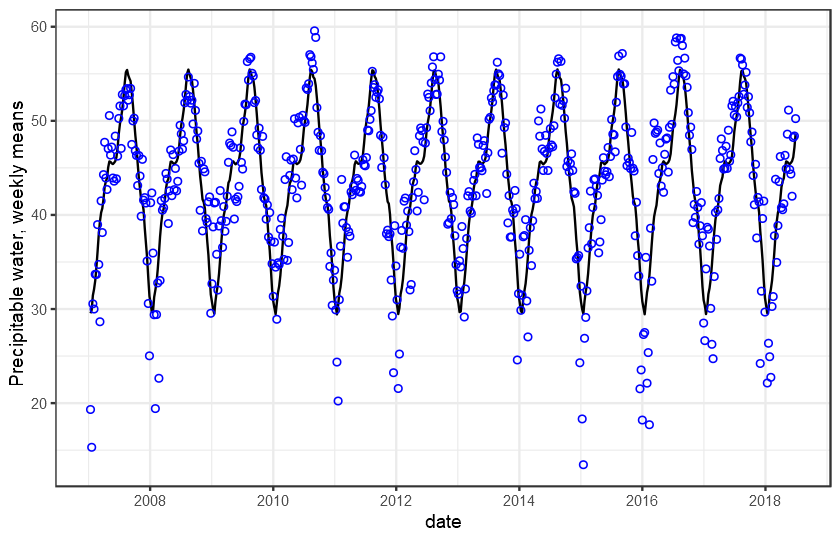

In [72]:
out = yearday_anom(df.in$Date,df.in$PW)
PW.bar = out$mean
PW.tilde = out$anomaly

options(repr.plot.width=7,repr.plot.height=4.5)
out %>% 
    ggplot(aes(x=date)) +
        geom_line(aes(y=mean)) +
        geom_point(aes(y=mean+anomaly),color="blue",shape=1) +
        labs(x="date",y="Precipitable water, weekly means") + theme_bw()

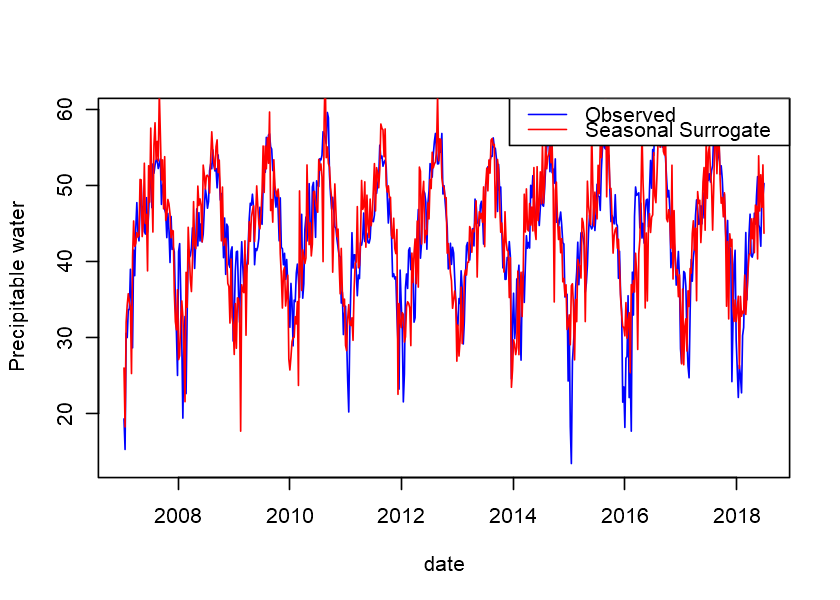

In [73]:
Surrs = do.call(cbind,
    lapply(1:500, function(i) {
        I_na = is.na(PW.tilde)
        out = PW.bar
        out[I_na] = NA
        out[!I_na] = out[!I_na] + sample(PW.tilde[!I_na],sum(!I_na),replace = FALSE)
        out[out<0] = 0
        return(out)
    })
)

options(repr.plot.width=7,repr.plot.height=5)
plot(df.in$Date,df.in$PW,type='l',col='blue',xlab='date',ylab='Precipitable water')
lines(df.in$Date,Surrs[,1],col='red')
legend(x="topright", legend=c("Observed","Seasonal Surrogate"), col=c("blue","red"), lwd=1, lty=c(1,1),bg='white')

In [74]:
block = df.in %>% select(Incidence,PW)
lib_ccm = c(1,NROW(df.in))

Emax=8

out = do.call(
    rbind,
    lapply(1:Emax, function(E_i) {
        pred_ccm = make_pred_nozero(block$Incidence,E_i)
        ccm(block=block,
            E=E_i,
            lib=lib_ccm,
            pred=pred_ccm,
            lib_sizes = NROW(block),
            exclusion_radius=0,
            random_libs = FALSE,
            num_sample=1,
            tp = -1,
            lib_column = 1,
            target_column = 2, 
            silent = TRUE) }
    )
)

E_star = out$E[which.max(out$rho)]
E_star

out

[1] 7

E,tau,tp,nn,lib_column,target_column,lib_size,num_pred,rho,mae,rmse
1,1,-1,2,1,2,127,127,0.3249440,7.118404,10.584418
2,1,-1,3,1,2,126,126,0.3994950,6.387507,9.390553
3,1,-1,4,1,2,125,125,0.5319953,5.805972,7.996163
4,1,-1,5,1,2,124,124,0.6273975,5.169045,7.089517
5,1,-1,6,1,2,123,123,0.7088539,4.501515,6.138850
6,1,-1,7,1,2,122,122,0.7132687,4.468889,6.118246
7,1,-1,8,1,2,121,121,0.7431070,4.223222,5.841180
8,1,-1,9,1,2,120,120,0.7348634,4.298341,5.994101


In [75]:
pred_ccm = make_pred_nozero(block$Incidence,E_star)
df.out.ccm = ccm(block=block,
                    E=E_star,
                    lib=lib_ccm,
                    pred = pred_ccm,
                    lib_sizes = NROW(block),
                    exclusion_radius=0,
                    random_libs = FALSE,
                    num_sample=1,
                    tp = 0, 
                    silent = TRUE)
df.out.ccm

E,tau,tp,nn,lib_column,target_column,lib_size,num_pred,rho,mae,rmse
7,1,0,8,1,2,120,120,0.7064806,4.421029,6.192893


In [76]:
df.out.ccm.surr = data.frame()

for (i_surr in 1:dim(Surrs)[2]) {
    block = data.frame(Incidence=df.in$Incidence,PW=Surrs[,i_surr])
    out = do.call(
        rbind,
        lapply(1:8, function(E_i){
            pred_ccm = make_pred_nozero(block$Incidence,E_i)
            ccm(block=block,
                E=E_i,
                lib=lib_ccm,
                pred=pred_ccm,
                lib_sizes = NROW(block),
                exclusion_radius=0,
                random_libs = FALSE,
                num_sample=1,
                tp = -1,
                lib_column = 1,
                target_column = 2, 
                silent=TRUE)
            }
        )
    )
    
    E_star = out$E[which.max(out$rho)]
    pred_ccm = make_pred_nozero(block$Incidence,E_star)
    out = ccm(block = block,
                    E = E_star,
                    lib = lib_ccm,
                    pred = pred_ccm,
                    lib_sizes = NROW(block),
                    exclusion_radius = 0,
                    random_libs = FALSE,
                    num_sample=1,
                    tp = 0,
                    silent=TRUE)
    df.out.ccm.surr <- df.out.ccm.surr %>% bind_rows(out)
}

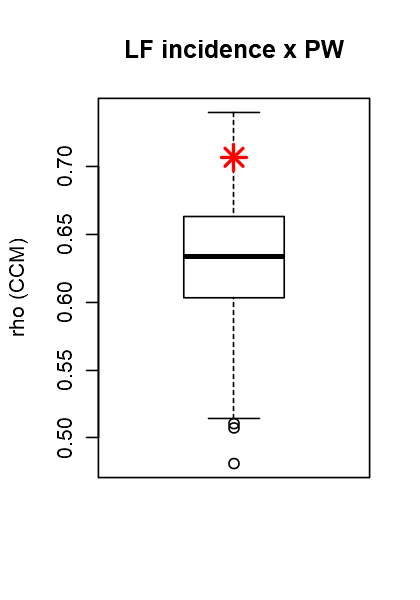

In [77]:
options(repr.plot.width=3.5,repr.plot.height=5)
boxplot(df.out.ccm.surr$rho, ylab='rho (CCM)', main='LF incidence x PW')
points(1,df.out.ccm$rho, pch=8, col='red', cex=2, lwd=2)

In [78]:
qs=c(.025,.25, .5, .75,.975)
data.frame(value=quantile(df.out.ccm.surr$rho,qs)) -> output
output$names <- paste0("q",rownames(output))
output %<>%
    mutate(names=substr(names,1,nchar(names)-1)) %>%
    spread(names,value) %>%
    mutate(rho.ccm=df.out.ccm$rho, 
           sign=df.out.ccm$rho>quantile(df.out.ccm.surr$rho,pvalue)[[1]])
output

q2.5,q25,q50,q75,q97.5,rho.ccm,sign
0.5531575,0.603203,0.6337439,0.6628001,0.7116426,0.7064806,FALSE


In [79]:
output %>% as.data.frame %>% mutate(class="Precipitable water") %>% select(class,everything()) %>% bind_rows(DfOutput) -> DfOutput
DfOutput

class,q2.5,q25,q50,q75,q97.5,rho.ccm,sign
Precipitable water,0.553157519,0.6032030,0.6337439,0.6628001,0.7116426,0.7064806,FALSE
Relative humidity,0.406589354,0.5027682,0.5503030,0.5896395,0.6460035,0.6086548,FALSE
Specific humidity,0.143133424,0.3071540,0.3818770,0.4447567,0.5696576,0.4137583,FALSE
Temperature,0.432179542,0.5028743,0.5375643,0.5743774,0.6329438,0.5683424,FALSE
Rainfall,0.002525495,0.1720166,0.2673849,0.3471649,0.4655471,0.6033615,TRUE


Warning message:
"Ignoring unknown aesthetics: width"

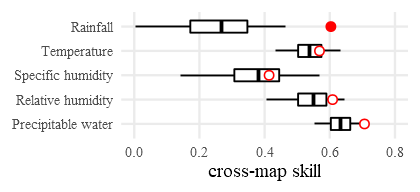

In [80]:
cs = c(3.5,1.6)
options(repr.plot.width=cs[1],repr.plot.height=cs[2])

DfOutput %>%
    ggplot(aes(factor(class,level=class))) +
        geom_boxplot(
            aes(ymin = q2.5, lower = q25, middle = q50, upper = q75, ymax = q97.5, width = 0.5),
            stat = "identity", fill='white', color="black", size=.4) +
        geom_point(aes(y=rho.ccm,fill=sign),shape=21, size=2,color="red") +
        scale_fill_manual(values=c("white", "red")) +
        theme_minimal(base_family='Times') + 
        coord_flip(ylim=c(0,.8),expand=.1) +
        labs(x=NULL,y="cross-map skill") +
        guides(fill=FALSE) +
        theme(plot.margin = unit(c(.5,.5,.5,.5),"lines"),
              axis.text.y = element_text(size=8), 
              panel.grid.minor = element_blank(),
              axis.ticks = element_blank()) -> p

p

ggsave(plot=p,width=cs[1],height=cs[2],filename="../figures/Fig2.pdf", useDingbats=FALSE)